# Homework 2

## Imports

In [ ]:
!pip install shap

In [ ]:
!pip install transformers

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

## Data and model preparation

In [ ]:
wine = load_wine()
scaled_wine_data = StandardScaler().fit_transform(wine['data'])
data = pd.DataFrame(
    data=np.c_[scaled_wine_data, wine['target']],
    columns=wine['feature_names'] + ['target']
)

features = list(data.columns)
features.remove('target')
x = data.loc[:, features].values
y = data.loc[:, ['target']].values
x = pd.DataFrame(x, columns=features)
y = pd.DataFrame(y, columns=['target'])
y['target'] = y['target'].astype('category')

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state=42
)

model = cls = RandomForestClassifier(
    max_depth=2,
    random_state=0
).fit(x_train, y_train.values.ravel())

score = model.score(x_test, y_test)
print(f'Score: {score}')

Score: 0.9661016949152542


## SHAP analysis

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

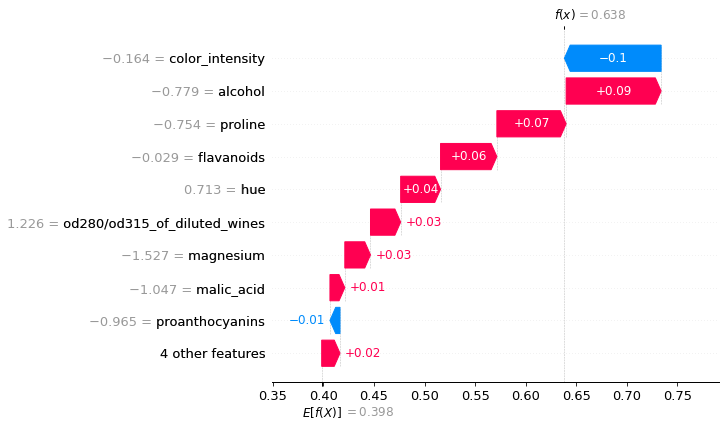

In [ ]:
idx = 4
cls = 1
shap.waterfall_plot(shap.Explanation(
    values=shap_values[cls][idx],
    base_values=explainer.expected_value[cls],
    data=x_test.iloc[idx],
    feature_names=features
))

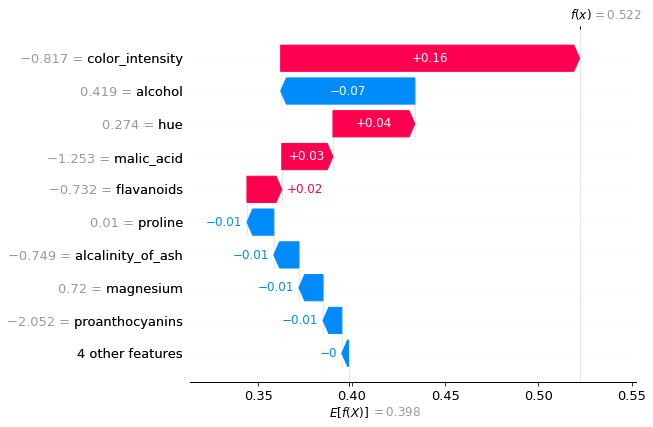

In [ ]:
idx = 43
cls = 1
shap.waterfall_plot(shap.Explanation(
    values=shap_values[cls][idx],
    base_values=explainer.expected_value[cls],
    data=x_test.iloc[idx],
    feature_names=features
))

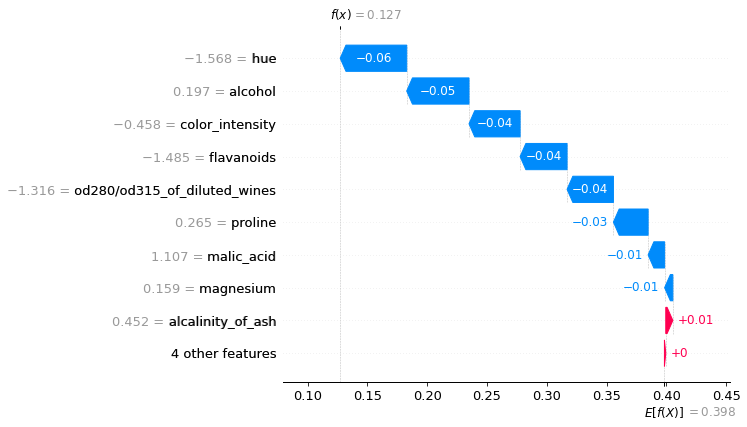

In [ ]:
idx = 32
cls = 1
shap.waterfall_plot(shap.Explanation(
    values=shap_values[cls][idx],
    base_values=explainer.expected_value[cls],
    data=x_test.iloc[idx],
    feature_names=features
))

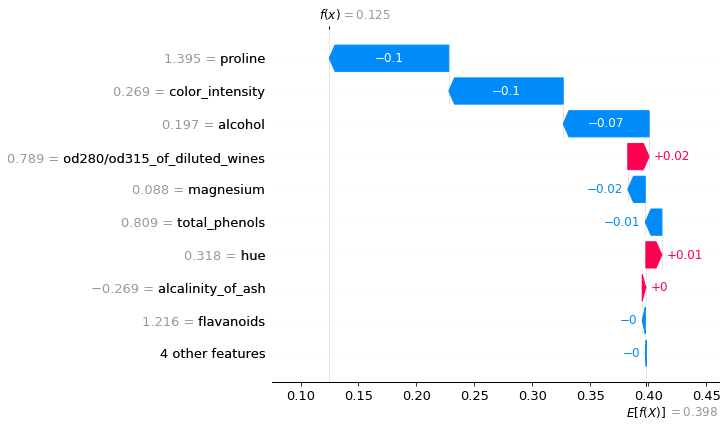

In [ ]:
idx = 45
cls = 1
shap.waterfall_plot(shap.Explanation(
    values=shap_values[cls][idx],
    base_values=explainer.expected_value[cls],
    data=x_test.iloc[idx],
    feature_names=features
))

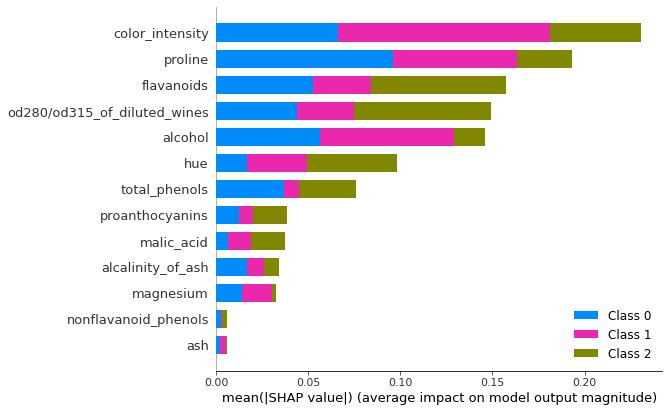

In [ ]:
shap.summary_plot(shap_values, x_test)

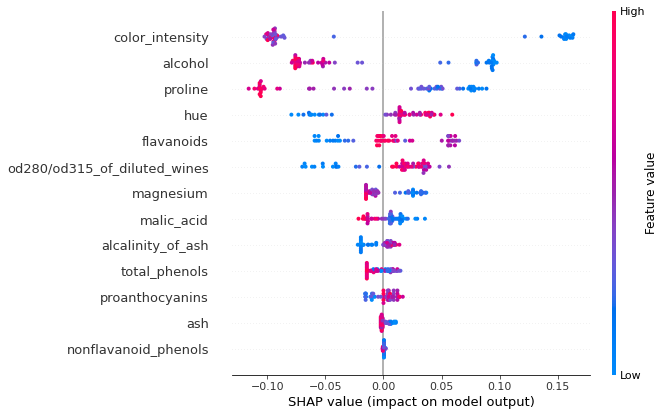

In [ ]:
shap.summary_plot(shap_values[1], x_test.values, feature_names=features)

In [ ]:
model_2 = KNeighborsClassifier().fit(x_train, y_train.values.ravel())

score = model_2.score(x_test, y_test)
print(f'Score: {score}')

Score: 0.9661016949152542


In [ ]:
models = [model, model_2]
fail_idxs = [[], []]

for m_idx, m in enumerate(models):
    for test_idx in range(x_test.shape[0]):
        observation = x_test.iloc[[test_idx]]
        prediction = m.predict(observation)
        ground_truth = y_test.iloc[test_idx, 0]

        if prediction != ground_truth:
            fail_idxs[m_idx].append(test_idx)
        
print(f'First model failed on: {fail_idxs[0]}')
print(f'Second model failed on: {fail_idxs[1]}')

First model failed on: [13, 21]
Second model failed on: [27, 56]


In [ ]:
explainer_2 = shap.KernelExplainer(model_2.predict_proba, x_train)
shap_values_2 = explainer_2.shap_values(x_test)

In [ ]:
idx = 21
cls = 1

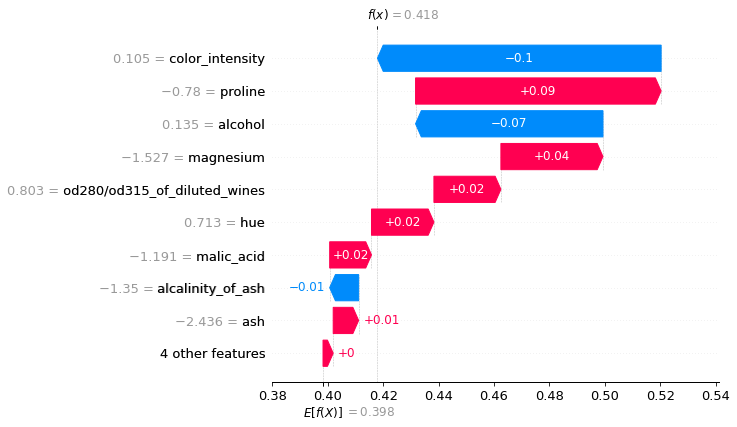

In [ ]:
shap.waterfall_plot(shap.Explanation(
    values=shap_values[cls][idx],
    base_values=explainer.expected_value[cls],
    data=x_test.iloc[idx],
    feature_names=features
))

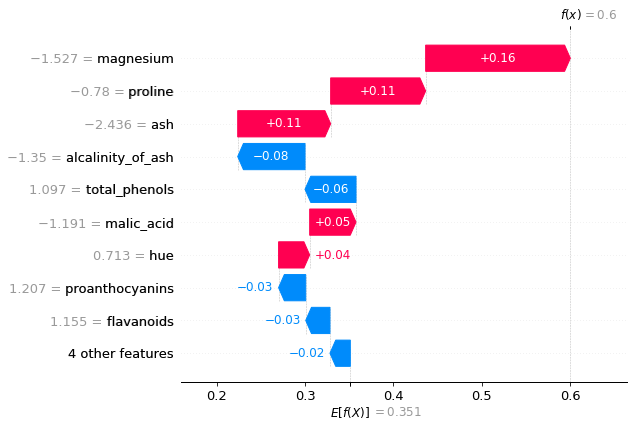

In [ ]:
shap.waterfall_plot(shap.Explanation(
    values=shap_values_2[cls][idx],
    base_values=explainer_2.expected_value[cls],
    data=x_test.iloc[idx],
    feature_names=features
))

In [ ]:
shap_values_2[cls]

IndexError: ignored

In [ ]:
wine = load_wine()
scaled_wine_data = StandardScaler().fit_transform(wine['data'])
data = pd.DataFrame(
    data=np.c_[scaled_wine_data, wine['target']],
    columns=wine['feature_names'] + ['target']
)

features = list(data.columns)
features.remove('target')
x = data.loc[:, features].values
y = data.loc[:, ['target']].values
x = pd.DataFrame(x, columns=features)
y = pd.DataFrame(y, columns=['target'])
y['target'] = y['target'].astype('category')

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state=42
)

model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=1.0,
    max_depth=1,
    random_state=0
).fit(x_train, y_train.values.ravel())

score = model.score(x_test, y_test)
print(f'Score: {score}')

Score: 0.9830508474576272


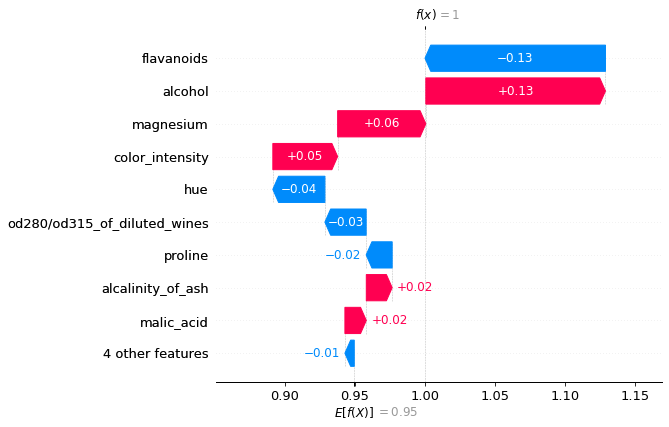

In [ ]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[11, :],
    feature_names=features
)

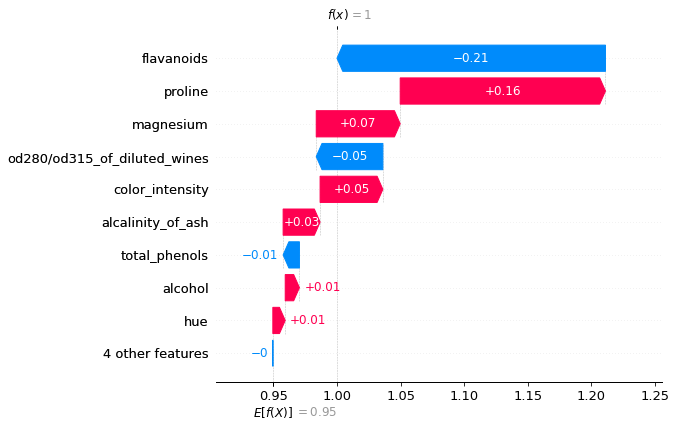

In [ ]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[16, :],
    feature_names=features
)

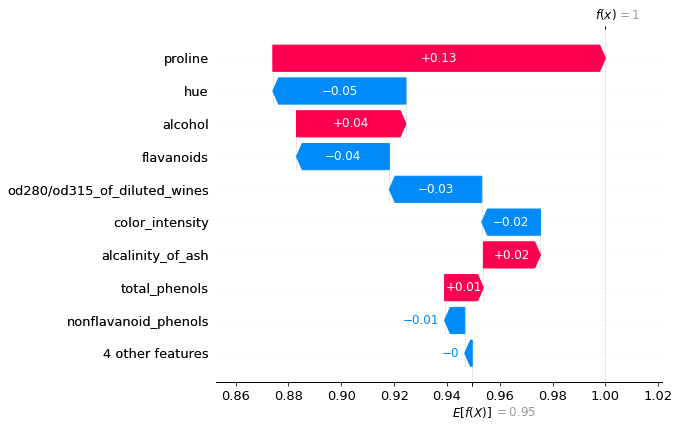

In [ ]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[22, :],
    feature_names=features
)

In [ ]:
# 11, 13, 16, 19, 20, 22, 29, 30, 31

16 i 11 hue w różne strony

22 i 11 - różnice w topce

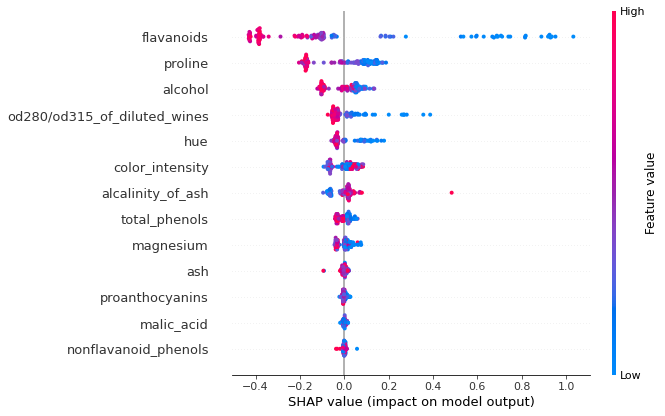

In [ ]:
shap.summary_plot(shap_values, x_train)

In [ ]:
explainer = shap.KernelExplainer(model.predict, x_train)
shap_values = explainer.shap_values(x_train)

In [ ]:
model_2 = MLPClassifier(
    random_state=1,
    max_iter=1000
).fit(x_train, y_train.values.ravel())

score = model_2.score(x_test, y_test)
print(f'Score: {score}')

Score: 0.9830508474576272


In [ ]:
explainer_2 = shap.KernelExplainer(model_2.predict, x_train)
shap_values_2 = explainer_2.shap_values(x_train)

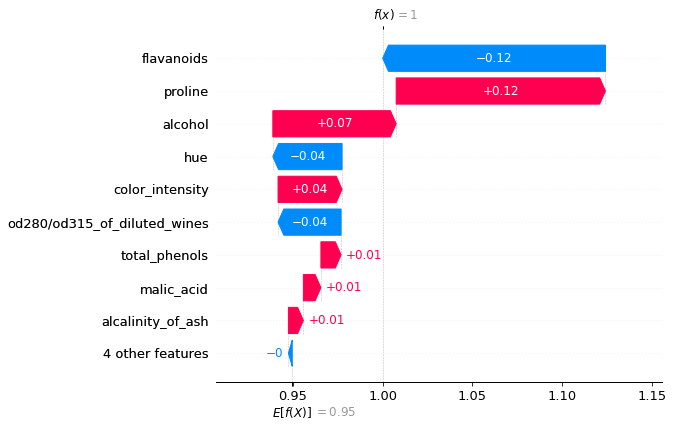

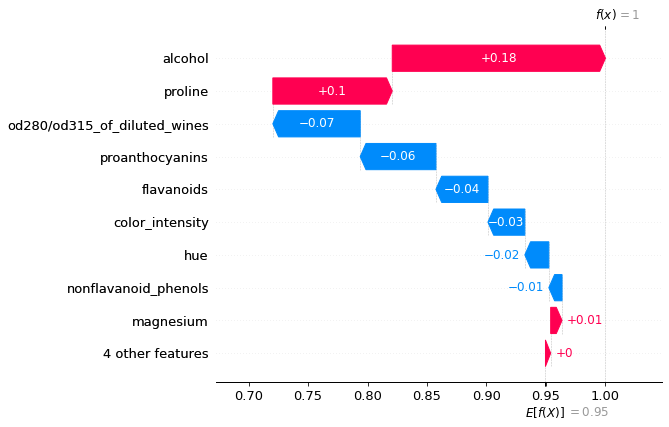

In [ ]:
idx = 31

shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[idx, :],
    feature_names=features
)

shap.plots._waterfall.waterfall_legacy(
    explainer_2.expected_value,
    shap_values_2[idx, :],
    feature_names=features
)

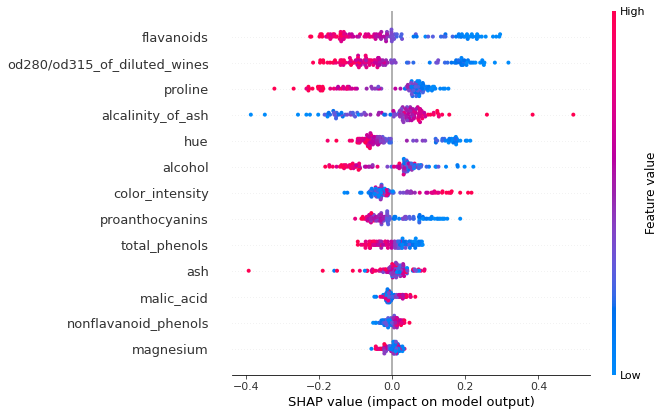

In [ ]:
shap.summary_plot(shap_values_2, x_train)